# <span style="color:darkblue"> Lecture 10: Subsetting Data </span>


<font size = "5">

Topics you should know up to this point:

- *Data Types:* int, float, str, lists, arrays,<br>
booleans, pandas dataframes

- *Numpy:* mathematical functions <br>
 and random numbers

- If/else statements and *loops*

If there are any of these topics you need help <br>
 understanding, please come to my office hours, <br>
  and I can explain the concepts again.

<font size = "5">

This lecture:

- pandas dataframes
- subsetting data


## <span style="color:darkblue"> I. Import Libraries and Read Files</span>

In [32]:
# the "pandas" library is for manipualting datasets
# the "matplotlib.pyplot" library is for creating graphs
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# Read the car features dataset
carfeatures = pd.read_csv("data_raw/features.csv")

# 398 cars with 7 variables 

## <span style="color:darkblue"> II. Basic data display </span>

<font size = "5">

<font size = "5">

Display a dataset

- Remember that in VS-Code there is also a data viewer.
- Go to the variables tab at the top of the notebook

In [34]:
# The display() command will show the first 5 rows and the last five rows

display(carfeatures)

# Display only shows first 5 rows and last 5 rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
0,18.0,8,307,130,3504,12.0,C-1689780
1,15.0,8,350,165,3693,11.5,B-1689791
2,18.0,8,318,150,3436,11.0,P-1689802
3,16.0,8,304,150,3433,12.0,A-1689813
4,17.0,8,302,140,3449,10.5,F-1689824
...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103
394,44.0,4,97,52,2130,24.6,V-1694114
395,32.0,4,135,84,2295,11.6,D-1694125
396,28.0,4,120,79,2625,18.6,F-1694136


In [4]:
carfeatures

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
0,18.0,8,307,130,3504,12.0,C-1689780
1,15.0,8,350,165,3693,11.5,B-1689791
2,18.0,8,318,150,3436,11.0,P-1689802
3,16.0,8,304,150,3433,12.0,A-1689813
4,17.0,8,302,140,3449,10.5,F-1689824
...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103
394,44.0,4,97,52,2130,24.6,V-1694114
395,32.0,4,135,84,2295,11.6,D-1694125
396,28.0,4,120,79,2625,18.6,F-1694136


<font size = "5" >

Extract column names

In [5]:
type(carfeatures.columns.values)

numpy.ndarray

In [6]:
# Write the name of the dataset and use a period "." to extract 
# the attribute "columns" and the subttribute "values"

car_colnames = carfeatures.columns.values
print(car_colnames)

# Python is an object orientated programming based on a set of object 
# Carfeatures is an object belong to the dataframe
# Operations are done with "."
# Index would not be counted as part of the variables 

['mpg' 'cylinders' 'displacement' 'horsepower' 'weight' 'acceleration'
 'vehicle_id']


<font size = "5">

Subset columns:

```python
data[list_names]
```

In [7]:
carfeatures[car_colnames[0]]

# Dataset[]
# outside is telling us that we are going to subset but inside the brackets 

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [8]:
carfeatures['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [9]:
carfeatures[["weight", "mpg"]]

,weight,mpg
0,3504,18.0
1,3693,15.0
2,3436,18.0
3,3433,16.0
4,3449,17.0
...,...,...
393,2790,27.0
394,2130,44.0
395,2295,32.0
396,2625,28.0


In [10]:
# To subset multiple columns write the name of the datasets 
# and enter a list in square brackets next to the name

list_subsetcols = ["weight","mpg"] # List of strings
subcols_carfeatures = carfeatures[list_subsetcols]
display(subcols_carfeatures)

# Or we can simply include the list directly inside square brackets
display(carfeatures[["weight","mpg"]])


,weight,mpg
0,3504,18.0
1,3693,15.0
2,3436,18.0
3,3433,16.0
4,3449,17.0
...,...,...
393,2790,27.0
394,2130,44.0
395,2295,32.0
396,2625,28.0


,weight,mpg
0,3504,18.0
1,3693,15.0
2,3436,18.0
3,3433,16.0
4,3449,17.0
...,...,...
393,2790,27.0
394,2130,44.0
395,2295,32.0
396,2625,28.0


<font size = "5">

Try it yourself!

- Extract the horsepower and weight variables

In [11]:
# Write your own code
carfeatures[["horsepower", "weight"]]

# Order we enter it matters as if it was weight first 
# and then horsepower we would see

,horsepower,weight
0,130,3504
1,165,3693
2,150,3436
3,150,3433
4,140,3449
...,...,...
393,86,2790
394,52,2130
395,84,2295
396,79,2625


## <span style="color:darkblue"> III. Subsetting by row/column position </span>

<font size = "5">

<font size = "5">

Sort by column

In [12]:
carsorted = carfeatures.sort_values(by = "mpg", ascending = False)
display(carsorted)


# Explicit explision 
# Looking at positions
# Time data is already sorted  
# Operation is sort_values
# ascending = False => highest value to lowest values (descending)
# Ascending = True => lowest to highest (ascending)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
322,46.6,4,86,65,2110,17.9,M-1693322
329,44.6,4,91,67,1850,13.8,H-1693399
325,44.3,4,90,48,2085,21.7,V-1693355
394,44.0,4,97,52,2130,24.6,V-1694114
326,43.4,4,90,48,2335,23.7,V-1693366
...,...,...,...,...,...,...,...
103,11.0,8,400,150,4997,14.0,C-1690913
67,11.0,8,429,208,4633,11.0,M-1690517
25,10.0,8,360,215,4615,14.0,F-1690055
26,10.0,8,307,200,4376,15.0,C-1690066


<font size = "5">

Subset row(s)

``` data.iloc[ row_int , : ]``` $\quad$ or

``` data.iloc[ list_rows, : ]```


In [13]:
carsorted.iloc[0, :]

# Extract row 0 and the collumn takes everything else 
# extract position use .iloc




mpg                  46.6
cylinders               4
displacement           86
horsepower             65
weight               2110
acceleration         17.9
vehicle_id      M-1693322
Name: 322, dtype: object

In [14]:
carsorted.iloc[[0,1,2]]

# Extract list -> default extract rows
# Anothr bracket would extract collumns 

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
322,46.6,4,86,65,2110,17.9,M-1693322
329,44.6,4,91,67,1850,13.8,H-1693399
325,44.3,4,90,48,2085,21.7,V-1693355


In [15]:
carfeatures.iloc[[0,1,2], [1,2]]

,cylinders,displacement
0,8,307
1,8,350
2,8,318


In [16]:
# The following command extracts all columns for row zero
# Remember that numbering starts at zero in Python
# In this case we will show the car with the highest "mpg" value

display(carsorted.iloc[0,:])
display(carsorted.iloc[[0,1,2],:])


mpg                  46.6
cylinders               4
displacement           86
horsepower             65
weight               2110
acceleration         17.9
vehicle_id      M-1693322
Name: 322, dtype: object

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
322,46.6,4,86,65,2110,17.9,M-1693322
329,44.6,4,91,67,1850,13.8,H-1693399
325,44.3,4,90,48,2085,21.7,V-1693355


In [17]:
carsorted.iloc[[0,1,2],:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
322,46.6,4,86,65,2110,17.9,M-1693322
329,44.6,4,91,67,1850,13.8,H-1693399
325,44.3,4,90,48,2085,21.7,V-1693355


In [18]:
carsorted.iloc[[0,1,2]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
322,46.6,4,86,65,2110,17.9,M-1693322
329,44.6,4,91,67,1850,13.8,H-1693399
325,44.3,4,90,48,2085,21.7,V-1693355


<font size = "5">

Subset block of rows

``` data.iloc[ lower:upper , : ]```

In [19]:
# Extract rows 0 to 5
display(carfeatures.iloc[0:5,:])
# Contain 5 elements starting at position 0 

# Extract rows 8 onwards
display(carfeatures.iloc[:8, : ])
# Contains 8 elements starting at position 0 


# Note: We can leave the numbers to the left and right of ":" blank
# in order to select all values before or after, respectively.



,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
0,18.0,8,307,130,3504,12.0,C-1689780
1,15.0,8,350,165,3693,11.5,B-1689791
2,18.0,8,318,150,3436,11.0,P-1689802
3,16.0,8,304,150,3433,12.0,A-1689813
4,17.0,8,302,140,3449,10.5,F-1689824


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
0,18.0,8,307,130,3504,12.0,C-1689780
1,15.0,8,350,165,3693,11.5,B-1689791
2,18.0,8,318,150,3436,11.0,P-1689802
3,16.0,8,304,150,3433,12.0,A-1689813
4,17.0,8,302,140,3449,10.5,F-1689824
5,15.0,8,429,198,4341,10.0,F-1689835
6,14.0,8,454,220,4354,9.0,C-1689846
7,14.0,8,440,215,4312,8.5,P-1689857


<font size = "5">

Similar for columns

- One column: $\quad$ ``` data.iloc[ : , col_integer ]```
- Multiple columns: $\quad$ ``` data.iloc[ : , list_cols ]```
- Row+Column: $\quad$ ``` data.iloc[ list_rows , list_cols ]```

<font size = "5">

Try it yourself!!

- Create a new datate called "car_ascendingmpg" which <br>
sorts cars from lowest to highest mpg
- Subset the data of 5 cars with the lowest "mpg"

HINT: Use ``sort_values(...,ascending = TRUE``)


In [20]:
# Write your own code

car_ascendingmpg = carfeatures.sort_values(by='mpg', ascending=True)
car_ascendingmpg.iloc[:5]

# Create our own dataset by having mpg in ascending order
# Subset to find the cars that have the lowest mpg


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
28,9.0,8,304,193,4732,18.5,H-1690088
25,10.0,8,360,215,4615,14.0,F-1690055
26,10.0,8,307,200,4376,15.0,C-1690066
103,11.0,8,400,150,4997,14.0,C-1690913
124,11.0,8,350,180,3664,11.0,O-1691144


## <span style="color:darkblue"> II. Filtering Dataframes Based on Logical Expressions </span>

<font size = "5">

(i) Filtering using ```pandas.query()``` 

```python
data.query("logical expression")
```

In [21]:
# Enter any logical expression

carfeatures.query("mpg >= 25")

# A string that contain a logical expressions
# A total of 169 cars has a mpg greater than 25

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
18,27.0,4,97,88,2130,14.5,D-1689978
19,26.0,4,97,46,1835,20.5,V-1689989
20,25.0,4,110,87,2672,17.5,P-1690000
22,25.0,4,104,95,2375,17.5,S-1690022
23,26.0,4,121,113,2234,12.5,B-1690033
...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103
394,44.0,4,97,52,2130,24.6,V-1694114
395,32.0,4,135,84,2295,11.6,D-1694125
396,28.0,4,120,79,2625,18.6,F-1694136


In [22]:
# Use "and" / "or" for logical operations on queries

carfeatures.query("(acceleration >= 10) and (acceleration < 18)")

# Be careful, usage of parenthesis are important when doing logical condition

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
0,18.0,8,307,130,3504,12.0,C-1689780
1,15.0,8,350,165,3693,11.5,B-1689791
2,18.0,8,318,150,3436,11.0,P-1689802
3,16.0,8,304,150,3433,12.0,A-1689813
4,17.0,8,302,140,3449,10.5,F-1689824
...,...,...,...,...,...,...,...
390,32.0,4,144,96,2665,13.9,T-1694070
391,36.0,4,135,84,2370,13.0,D-1694081
392,27.0,4,151,90,2950,17.3,C-1694092
393,27.0,4,140,86,2790,15.6,F-1694103


<font size = "5">

(ii) Expressions with colnames + global variables (@)

In [23]:
# You can invoke global variables into the query by using @variablename
# If you don't include @, then Python will try to look for a column with 
# that name.

threshold = 25
data_varthreshold_mpg = carfeatures.query("mpg >= @threshold")

# Add a treshold and run the query 
# Including the @ is important as python would believe that it is a variable 


In [24]:
carfeatures[carfeatures['mpg']>=threshold]

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
18,27.0,4,97,88,2130,14.5,D-1689978
19,26.0,4,97,46,1835,20.5,V-1689989
20,25.0,4,110,87,2672,17.5,P-1690000
22,25.0,4,104,95,2375,17.5,S-1690022
23,26.0,4,121,113,2234,12.5,B-1690033
...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103
394,44.0,4,97,52,2130,24.6,V-1694114
395,32.0,4,135,84,2295,11.6,D-1694125
396,28.0,4,120,79,2625,18.6,F-1694136


<font size = "5">

(iii) Expressions with colnames with spaces

In [25]:
# Sometimes column names have spaces in them
# In this case use the "`" symbol, e.g.          `variable name`

carfeatures["new variable"] = carfeatures["mpg"]
data_spacesthreshold_mpg = carfeatures.query("`new variable` >= 25")


In [26]:
carfeatures["new variable two"] = carfeatures["mpg"]
data_spacesthreshold_mpg_two = carfeatures.query("`new variable two` >= 25")

<font size = "5">

Try it yourself!

-  Subset the data with mpg $\ge$ 25 and cylinders == 8

In [27]:
# Write your own code here


subset_data = carfeatures.query( "(mpg >= 25) and (cylinders == 8)" )
display(subset_data)


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,new variable,new variable two
364,26.6,8,350,105,3725,19.0,O-1693784,26.6,26.6


## <span style="color:darkblue"> III. Visualization for Subsets of the Data </span>


<font size = "5">

List of unique categories

In [28]:
# Use pd.unique() to extract a list with the unique elements in that column

list_unique_cylinders = pd.unique(carfeatures["cylinders"])
print(list_unique_cylinders)

# 8,4,6,3,5 are the only ones present in the data set

[8 4 6 3 5]


<font size = "5">

Compute two overlapping plots

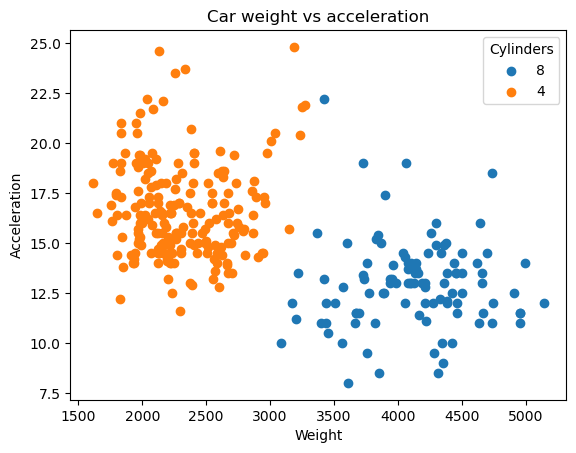

In [29]:
# If we call plt.scatter() twice to display two plots
# To display all plots simultaneously we include plt.show() at the very end.
# The idea is that the graphs are stacked on top of each other

df_8 = carfeatures.query("cylinders == 8")
df_4 = carfeatures.query("cylinders == 4")

plt.scatter(x = df_8["weight"],y = df_8["acceleration"])
plt.scatter(x = df_4["weight"],y = df_4["acceleration"])
plt.legend(labels = ["8","4"],
           title  = "Cylinders")
plt.xlabel("Weight")
plt.ylabel("Acceleration")
plt.title("Car weight vs acceleration")
plt.show()


# Note: If we put plt.show() in between the plots, then the results will
# be shown on separate graphs instead.

<font size = "5">

Compute plots by all categories

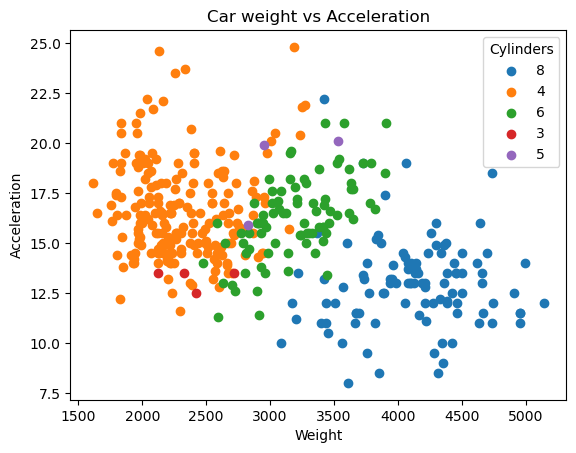

In [30]:
# Compute number of unique categories
list_unique_cylinders = pd.unique(carfeatures["cylinders"])

# Use a for loop to plot a scatter plot between "weight" and "acceleration"
# for each category. Each plot  will have a different color

for category in list_unique_cylinders:
    df   = carfeatures.query("cylinders == @category")
    plt.scatter(x = df["weight"],y = df["acceleration"])

# 1 category in a list of unique cylinders
# cylinders == to each of the category (use @)
# df is an intermediate 

# Add labels and a legends    
plt.xlabel("Weight")
plt.ylabel("Acceleration")
plt.title("Car weight vs Acceleration")
plt.legend(labels = list_unique_cylinders,
           title  = "Cylinders")
plt.show()

# Show bivariate relationship 
# Pattern heavier cars have lower acceleration 

<font size = "5">

Try it yourself!

- Compute a histogram of "mpg" by cylinder count
- Make the histograms transparent by adjusting ```alpha``` in

 ```plt.hist(x = ..., alpha = 0.5)``` 

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

<Figure size 640x480 with 1 Axes>